In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import time
%matplotlib inline

In [2]:
ftypes_train = dict(row_id=np.int32, x=np.float32, y=np.float32, accuracy=np.int32, time=np.int32, place_id=np.int64)
ftypes_test = dict(row_id=np.int32, x=np.float32, y=np.float32, accuracy=np.int32, time=np.int32)
df_train = pd.read_csv("train.csv", dtype=ftypes_train)
df_test = pd.read_csv("test.csv", dtype=ftypes_test)

In [3]:
# Add some time fields
df_train["hour"]       = (df_train["time"]%(60*24))//60.
df_train["dayofweek"]  = np.ceil((df_train["time"]%(60*24*7))//(60.*24))
df_train["day"]  = np.ceil((df_train["time"]/(60*24)))
df_train["week"] = np.ceil((df_train["time"]/(60*24*7)))
df_test["hour"]        = (df_test["time"]%(60*24))//60.
df_test["dayofweek"]   = np.ceil((df_test["time"]%(60*24*7))//(60.*24))
df_test["day"]   = np.ceil((df_test["time"]/(60*24)))
df_test["week"]  = np.ceil((df_test["time"]/(60*24*7)))

In [4]:
a = df_train.groupby("place_id")["accuracy"].nunique()
b = pd.DataFrame(a)
df = df_train[df_train['place_id']==7142415885]

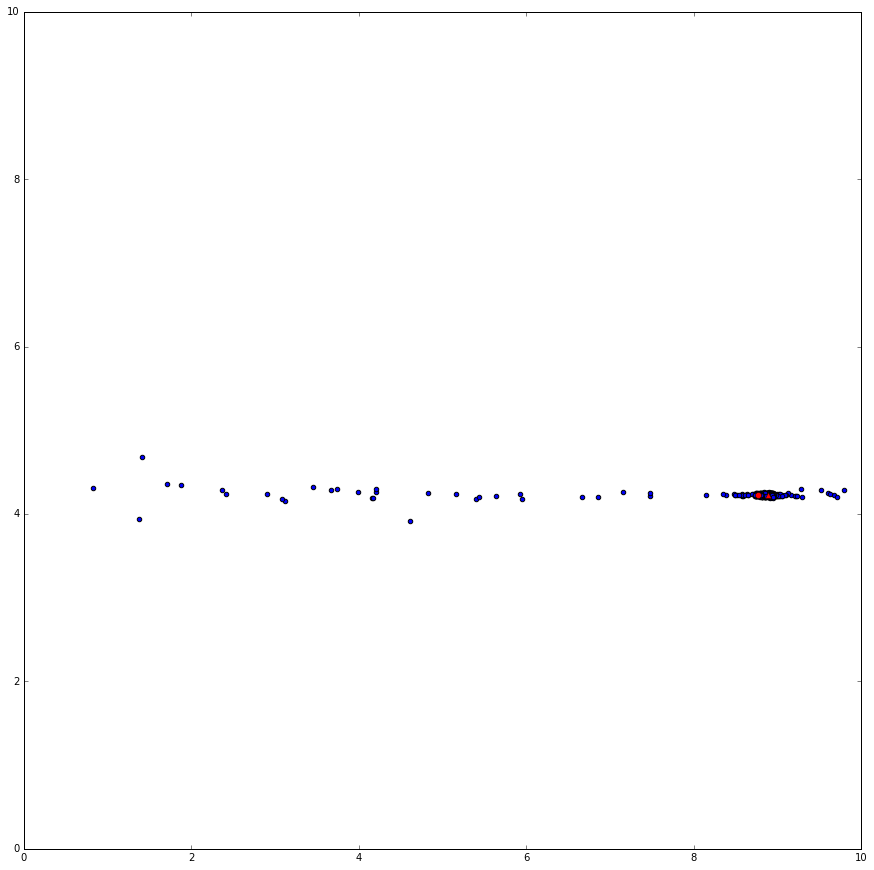

In [6]:
plt.figure(0, figsize=(15,15))
plt.scatter(df['x'],df['y'])
plt.plot(df['x'].mean(),df['y'].mean(),'ro')
plt.plot(df['x'].median(),df['y'].median(),'r^')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
#plt.xticks(np.arange(min(df['x']), max(df['x']), 0.5))
#plt.yticks(np.arange(min(df['y']), max(df['y']), 0.5))

In [7]:
from scipy.spatial import distance
def dist(x):
    a = abs(x[0]-x_med)
    b = abs(x[1]-y_med)
    return distance.euclidean(a,b)

In [10]:
c = np.array(abs(df['x']-df['x'].median()))
d = np.array(abs(df['y']-df['y'].median()))

In [20]:
dst = distance.euclidean(c,d)

In [26]:
lst = []
for i in range(len(c)):
    lst.append(np.sqrt(np.square(c[i])+np.square(d[i])))

In [31]:
np.sqrt(np.square(3)+np.square(4))

5.0

In [33]:
x_med = df['x'].median()
y_med = df['y'].median()
df['diffx'] = np.square(abs(df['x']-x_med))
df['diffy'] = np.square(abs(df['y']-y_med))

/home/ds/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ds/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
x_med,y_med

(8.88659954071045, 4.227799892425537)

In [36]:
df['diffsum'] = np.sqrt(df['diffx'] + df['diffy'])

/home/ds/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
df = df.drop(['diffx','diffy'],axis=1)

In [42]:
df.rename(columns = {'diffsum':'dist'}, inplace = True)

In [43]:
df.head()

,row_id,x,y,accuracy,time,place_id,hour,dayofweek,day,week,dist
48311,48311,8.9098,4.2349,324,122161,7142415885,20,0.0,85.0,13.0,0.024262
92439,92439,8.9110,4.2285,410,495458,7142415885,1,1.0,345.0,50.0,0.024411
109171,109171,8.8416,4.2204,3,129632,7142415885,0,6.0,91.0,13.0,0.045604
109636,109636,8.8137,4.2281,13,73257,7142415885,20,1.0,51.0,8.0,0.072900
124221,124221,8.8010,4.2423,84,73356,7142415885,22,1.0,51.0,8.0,0.086819


In [48]:
df1 = df.sort_values(by='dist',axis=0,ascending=False)

In [50]:
df1.head()

,row_id,x,y,accuracy,time,place_id,hour,dayofweek,day,week,dist
1944313,1944313,0.8252,4.3077,55,676932,7142415885,2,1.0,471.0,68.0,8.061795
27899325,27899325,1.3759,3.9363,84,329801,7142415885,0,5.0,230.0,33.0,7.516354
22313583,22313583,1.4051,4.6790,34,686981,7142415885,1,1.0,478.0,69.0,7.495093
19888532,19888532,1.7130,4.3580,26,33411,7142415885,4,2.0,24.0,4.0,7.174781
23404925,23404925,1.8790,4.3504,68,404924,7142415885,4,1.0,282.0,41.0,7.008672


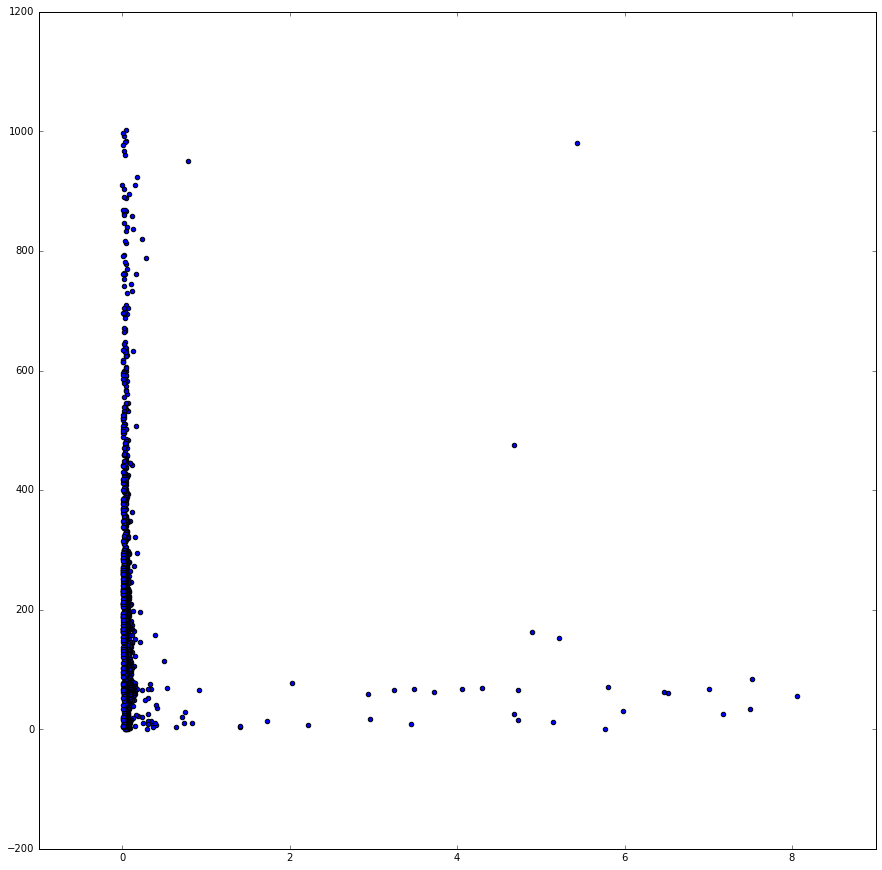

In [54]:
plt.figure(0, figsize=(15,15))
plt.scatter(df['dist'],df['accuracy'])
plt.draw()

In [58]:
b.sort_values('accuracy',ascending=False)

,accuracy
place_id,
7142415885,492
8295507377,439
3395313490,437
4223683383,435
2452223908,427
1402090066,421
4653831541,411
6209036800,403
5378208693,401


/home/ds/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ds/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ds/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

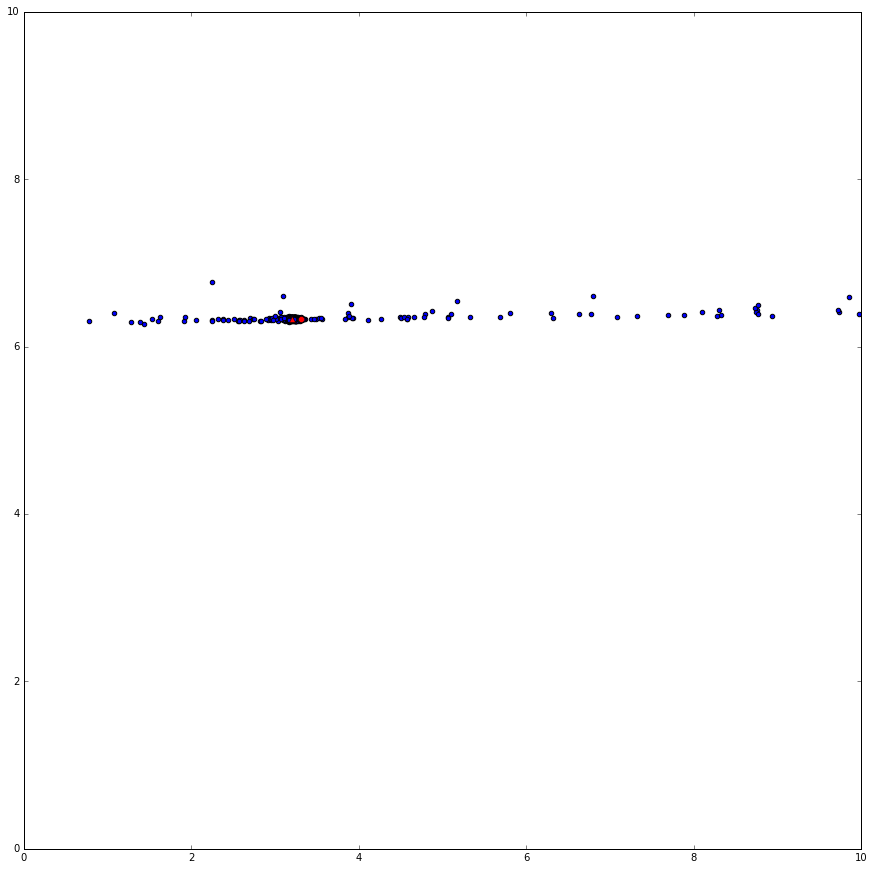

In [65]:
df = df_train[df_train['place_id']==8295507377]
plt.figure(0, figsize=(15,15))
plt.scatter(df['x'],df['y'])
plt.plot(df['x'].mean(),df['y'].mean(),'ro')
plt.plot(df['x'].median(),df['y'].median(),'r^')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

x_med = df['x'].median()
y_med = df['y'].median()
df['diffx'] = np.square(abs(df['x']-x_med))
df['diffy'] = np.square(abs(df['y']-y_med))
df['diffsum'] = np.sqrt(df['diffx'] + df['diffy'])
df = df.drop(['diffx','diffy'],axis=1)
df.rename(columns = {'diffsum':'dist'}, inplace = True)
df1 = df.sort_values(by='dist',axis=0,ascending=False)

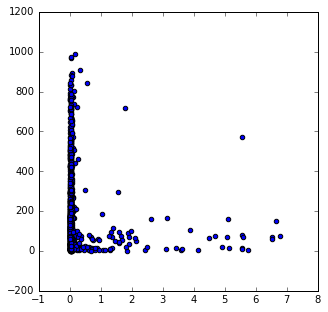

In [73]:
plt.figure(0, figsize=(5,5))
plt.scatter(df['dist'],df['accuracy'])
plt.draw()

In [100]:
df[df['dist']>0.05].shape

(284, 11)

In [81]:
x_med,y_med

(3.197000026702881, 6.330900192260742)

In [89]:
df.shape

(1085, 11)

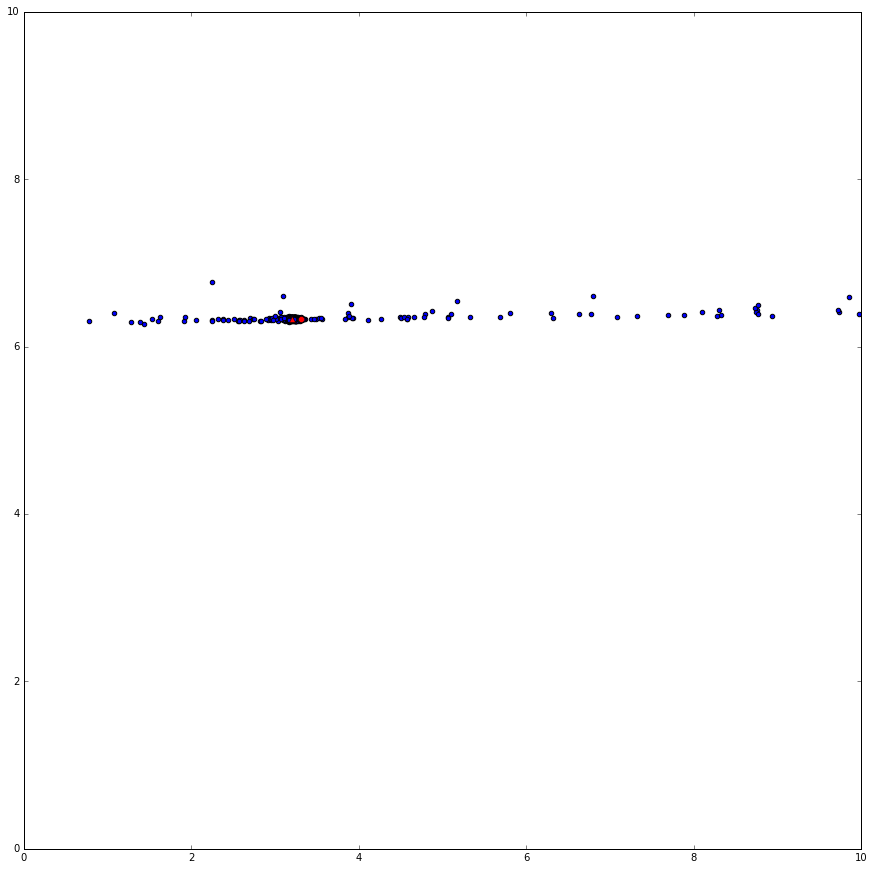

In [104]:
df = df_train[df_train['place_id']==8295507377]
plt.figure(0, figsize=(15,15))
plt.scatter(df['x'],df['y'])
plt.plot(df['x'].mean(),df['y'].mean(),'ro')
plt.plot(df['x'].median(),df['y'].median(),'r^')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

In [141]:
x_med = df['x'].median()
y_med = df['y'].median()
df['diffx'] = abs(df['x']/df['y'])
df1 = df.sort_values(by='diffx',axis=0,ascending=False)

/home/ds/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


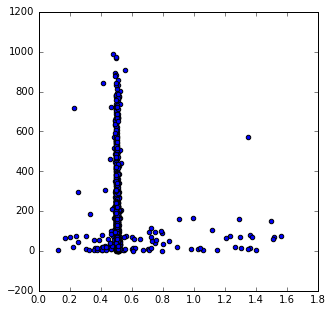

In [142]:
plt.figure(0, figsize=(5,5))
plt.scatter(df['diffx'],df['accuracy'])
plt.draw()